# ODEs: Projectile motion


In one of our problem sets, we simulated the the equation for a projectile. Of course, the answer is:

$$
\vec{x}(t) = \frac{1}{2}\vec{a}_0t^2 + \vec{v}_0 t + \vec{x}_0
$$

However, we now will be looking into direct solution of the ordinary differential equation using numerical methods. The equation of motion is

$$
\ddot{\vec{r}}(t) = -g\hat{y}
$$

We will try three different methods:

- Euler 
$$\vec{v}_{n+1} = \vec{v}_n + \tau \vec{a}_n$$
$$\vec{x}_{n+1} = \vec{x}_n + \tau \vec{v}_n$$
- Euler-Cromer
$$\vec{v}_{n+1} = \vec{v}_n + \tau \vec{a}_n$$
$$\vec{x}_{n+1} = \vec{x}_n + \tau \vec{v}_{n+1}$$
- Midpoint
$$\vec{v}_{n+1} = \vec{v}_n + \tau \vec{a}_n$$
$$\vec{x}_{n+1} = \vec{x}_n + \frac{\tau}{2}\left(\vec{v}_n + \vec{v}_{n+1}\right)$$


We will also investigate using air resistance:

$$F_D = \frac{1}{2}\rho v^2 C_D A$$


In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['legend.fancybox'] = True
import matplotlib.pyplot as plt
from odes import *

In [2]:
# Use air resistance or not?
airFlag = True

# Method:
method = b'Midpoint'
# OR: 
# method = 'Euler'
# method = 'Euler-Cromer'
# method = 'Midpoint'

# Maximum number of steps
maxStep = 1000

# Time step
tau = 0.05

# Height
h = 1.8 # m

# Initial x velocity
vix = 40 # m / s   # Around 90 mph



# Max time
tmax = tau * maxStep

#* Physical parameters (mass, Cd, etc.)
Cd = 0.35      # Drag coefficient (dimensionless)
area = 4.3e-3  # Cross-sectional area of projectile (m^2)
grav = -9.81    # Gravitational acceleration (m/s^2)
mass = 0.145   # Mass of projectile (kg)
if not airFlag  :
    rho = 0      # No air resistance
else :
    rho = 1.2    # Density of air (kg/m^3)
air_const = 0.5*Cd*rho*area/mass  # Air resistance constant

print(air_const)

# State values.
t = np.arange(0,tmax,tau)
r = np.zeros((maxStep,2))
v = np.zeros((maxStep,2))
a = np.zeros((maxStep,2))
r[0,:] = np.array([0,h])
v[0,:] = np.array([vix,0])
a[0,:] = np.array([0,grav])

0.006227586206896551


### Get true solutions with no air resistance

In [3]:

r0 = np.array(r[0]).reshape((2,1))
v0 = np.array(v[0]).reshape((2,1))
a0 = np.array(a[0]).reshape((2,1))
rtrue = r0 + v0 * t + 0.5 * a0*t**2
cut = (rtrue[1,:] > 0)
rtrue = rtrue.T[cut].T

### Simulate the trajectory

In [4]:
#* Loop until ball hits ground or max steps completed
ri = np.array(r[0])
vi = np.array(v[0])
ai = np.array(a[0])
state = np.array( [ri,vi,ai] )
for iStep in np.arange(1,maxStep) :
    ti = t[iStep-1]
    normV = np.linalg.norm( state[1] )
    state[2] =-air_const*normV * state[1]
    state[2][1] += grav
    #* Calculate the new position and velocity using Euler method
    if method == b'Euler' :
        state = step_euler(tau, state)
    elif method == b'Euler-Cromer' :
        state = step_euler_cromer(tau, state)
    else : # Midpoint step
        state = step_midpoint(tau,state)        
    r[iStep] = state[0]
    v[iStep] = state[1]
    a[iStep] = state[2]

### Plot it for $y>0$

In [5]:
cut = (r[:,1] > 0)
r = r[cut]
v = v[cut]
a = a[cut]
t = t[cut]

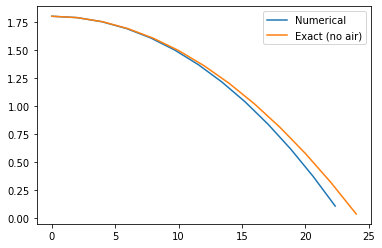

In [6]:

plt.plot(r[:,0],r[:,1], label="Numerical")
plt.plot(rtrue[0,:], rtrue[1,:], label="Exact (no air)")
plt.legend()
plt.show()